## Practical Data Science

How do we use data science in real world applications? 

*About the Data*

We are using a dataset from Kaggle that gives us the position, salary, and year of each White House employee from 2009-2017. You can reade more about our source and how they obtained their data here: https://www.kaggle.com/adamschroeder/white-house-salaries 

*Our Procedure* 

This workshop will focus on conducting a simple permutation test on the salaries from the year 2016 and the year 2017. Our goal is to investigate the differences between the salaries of the last year Obama administration staff and the first year Trump administration staff. 

### Step 1: Loading in Our Libraries 

Today we will be using Pandas, matplotlib, Seaborn, regular expressions, and NumPy. 

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('mode.chained_assignment', None)

### Step 2: Loading in Our Data

Since our CSV file is in the same folder as our notebook, we can read the CSV with a direct call to the file name instead of having to write a full path.

In [2]:
obama = pd.read_csv("obama_staff_salaries.csv")
trump = pd.read_csv("white_house_2017_salaries.csv")

### Step 3: Data Cleaning and EDA

First, we need to filter our Obama data to only consist of the year 2016. This is because this data set ranges from 2009-2016. Our Trump data is already only a year long, so that remains. However, we must standardize the data forms across both data frames so that we can permute them. This is because when we shuffle our data, we will want to find the test statistic for each shuffle we make. Thus, if the datatypes are different, there will be errors. 

In [3]:
# We will use logical filtering 

obama[obama["year"] == 2016]

obama16 = obama[obama["year"] == 2016]

# We will make the salary column into integers

obama16.loc[:, "salary"]

obama16.loc[:, "salary"].map(lambda x: int(x))

obama16.loc[:, "salary"] = obama16.loc[:, "salary"].map(lambda x: int(x))

Let's make a quick detour to get a more comprehensive look at our Obama data. Since we will only be comparing one year, 2016, let's use our filtering techniques above to see if 2016 was an outlier, or had an abnormal value. In this case, comparing 2016 to 2017 might not be the best permutation test without more information. Our goal is to compare the salary rate for both administrations. An outlier would be caused by many more cofounding variables that we would have to address. 

In [4]:
# We're going to strip the dollar sign character and convert
# The data type into floats to do analysis on it

obama.loc[:, "salary"] = obama["salary"].map(lambda x: float(x.strip('$')))

obama.loc[:, ['salary', 'year']]

obama.loc[:, ['salary', 'year']].groupby('year')

obama.loc[:, ['salary', 'year']].groupby('year').mean()

,salary
year,
2009,80384.439425
2010,82721.336887
2011,81765.337004
2012,80843.138889
2013,82303.869565
2014,82844.133772
2015,84864.124473
2016,84223.625000


Looks good! Let's move on to cleaning the Trump data. We're going to use something called [regular expressions](https://docs.python.org/3/howto/regex.html) to filter and convert the data and then use list comprehension to loop through the values. 

In [5]:
# We're going to test our regular expression on a single value in
# Our Trump dataset by forcing an error if our regular expression doesn't work 

test_val = trump['SALARY'][0]

# assert re.match('\$', 'hi')

assert re.match('\$', test_val)

First we need to clean our Trump dollar data. We need a clean integer to do analysis. This is because our Obama data is also in a clean integer format. 

In [8]:
test_val.split(',')

''.join(test_val.split(','))

''.join(test_val.split(',')).strip('$')

float(''.join(test_val.split(',')).strip('$'))

int(float(''.join(test_val.split(',')).strip('$')))

56000

In [43]:
# list comprehension format 
# [procedure(x) if (filter == True) else x for x in (list to iterate through)]

#trump.loc[:, "SALARY"] = [int(float(''.join(t.split(',')).strip('$'))) if re.match('\$', t) else t for t in trump['SALARY']]

trump['salary'] = trump.loc[:, "SALARY"]

### Step 4: Hypothesis Testing

How did salaries change from the Obama administration to the Trump administration? 

To set up our hypothesis, we need to determine the test statistic we want to use. A test statistic is an observed value that we will use later to calculate our p-value. 

A good statistic when we're working with salary data is the median because it isn't as affected by outliers. Instead, it gives us a value that we know has 50% of the data less than it and 50% of the data larger than it. Salary data is often misrepresented by the average because the distribution is rarely normal. We will look at histograms of our salary data to visualize this statement. 

Once we find our two sample medians, we can go ahead and define our test statistic. Our test statistic will be the difference between our observed median statistics. 

Let's define our parameters. Parameters are different than statistics because they represent the entire population, not just our sample. They are usually unknown. If we knew them, there would be no need for statistical procedures!

$M_t$ = True median of Trump administration salaries 

$M_o$ = True median of Obama administration salaries

We will assume both of our data sets are simple random samples from the universe of all possible Trump and Obama administration salaries. That is, the only difference in salary median we see is due by chance. 

So, we say:

$H_o =  M_t - M_o = 0$ 

$H_a = M_t - M_o \neq 0$

$H_o$ is our null hypothesis, which says that the distribution for salaries is the same for the Obama administration and Trump administration and any variation is due by chance. 

$H_a$ is our alternative hypothesis, which says that the two distributions are not equal. We will be using a double-sided hypothesis, which means that the difference could be positive or negative on average. 

Trump salary median: 89000.0
Trump salary mean: 94872.0


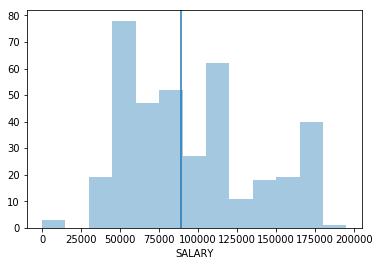

In [27]:
# We're going to find the median with a simple series method

m_t = trump['SALARY'].median()

# Below is our formatting for printing in Jupyter notebooks
print("Trump salary median:", m_t)
print("Trump salary mean:", trump['SALARY'].mean())

# Here is our histogram
# sns.distplot(data, kde=False, bins=np.arange())
sns.distplot(trump['SALARY'], kde=False, bins=np.arange(0,200000,15000))
plt.axvline(m_t)

Obama salary median: 73051.0
Obama salary mean: 84223.625


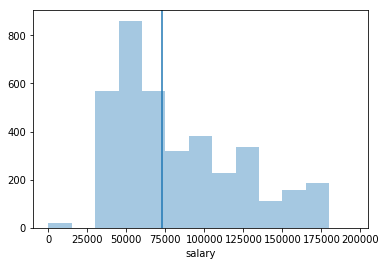

In [30]:
m_o = obama16['salary'].median()

print("Obama salary median:", m_o)
print("Obama salary mean:", obama16['salary'].mean())

sns.distplot(obama['salary'], kde=False, bins=np.arange(0,200000,15000))
plt.axvline(m_o)

In [93]:
t_stat = m_t - m_o
t_stat

15949.0

#### A/B Testing 

To test our hypothesis, we will be using A/B testing. It is a variation of a permutation test. Under the null hypothesis, there should be no difference whether a salary was from the Obama administration or Trump administration on the median of each respective group. That's because the null hypothesis states that both years are simple random samples from the same distribution of salaries.

To mimic this, we will "shuffle" the data and give new labels to all the salaries. 

Then, we will group by president and find the median for these "new" administration salaries. 

We will repeat that many, many times (thousands) to simulate what it would be like if we took every permutation possible. Why don't we just produce every permutation possible? That would be (472 + 377)! times ... A really big number! Much bigger than we need to get accurate results.

At the end, we will make a histogram of all our permuted test statistics. It should appear roughly normal because of the central limit theorem. Because we are simulating the null distribution, it should be centered around 0 (if both years are, under the null, from the same distribution, than their true median is the same!). After we see our histogram, we will find the p-value.

To start our permutation, we need to assign each row in each table an indicator that we can shuffle. We will simply use the names of the president in term. 

In [37]:
# Creating a series of each string and multiplying it by that length 

obama16['pres'] = ['obama'] * len(obama16)
trump['pres'] = ['trump'] * len(trump)

trump.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,pres
0,"Alexander, Monica K.",Employee,56000,Per Annum,EXECUTIVE ASSISTANT,trump
1,"Ambrosini, Michael J.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,trump
2,"Amin, Stacy C.",Employee,140000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,trump
3,"Andersen, Whitney N.",Employee,94000,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,trump
4,"Anderson, Alexander J.",Employee,77000,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,trump


In [52]:
# Making one big giant table 

trump_pmtn = trump[['salary', 'pres']]
obama_pmtn = obama16[['salary', 'pres']]

# Attaching the two tables using concat

salaries = pd.concat([trump_pmtn, obama_pmtn], sort=False)

# Getting a Series to shuffle with that has 472 'obama's and 377 'trump's

pres_arr = salaries['pres'].values

salaries.head()

,salary,pres
0,56000,trump
1,95000,trump
2,140000,trump
3,94000,trump
4,77000,trump


Now here comes the fun part. To shuffle the data, we will create a for loop that will give us an array of test statistics, one for each loop. We will usually have this loop give us 5000 to 10000 statistics. This will simulate getting the test statistic for all the possible permutations of labels to this data. We will go through how we shuffle and obtain a new statistic, then generalize it for the for loop. 

In [82]:
# Let's break down what we will be putting in our for loop

test_salary = salaries['salary'].values

np.random.shuffle(test_salary)

test_salary # run this a few times and see what happens!

# now make a new df 

pd.DataFrame({'salary':test_salary, 'pres':pres_arr})

# group it like before

pd.DataFrame({'salary':test_salary, 'pres':pres_arr}).groupby('pres').median()

# obtain statistic 

test_df = pd.DataFrame({'salary':test_salary, 'pres':pres_arr}).groupby('pres').median()

test_df.iloc[1] - test_df.iloc[0]

salary    593
dtype: int64

In [99]:
# make an array of how many repetitions we want
rep = np.arange(5000)

# create an empty array to store our data
null_stats = []

for i in rep: 
    # obtain the salaries like before and shuffle
    shuffled_salaries = salaries['salary'].values
    np.random.shuffle(shuffled_salaries)
    
    # assign to a new df
    df = pd.DataFrame({'salary':shuffled_salaries, 'pres':pres_arr}).groupby('pres').median()
    
    # get the test statistic
    val = df.iloc[1].values - df.iloc[0].values
    
    # place it in the empty array to collect them all 
    null_stats = np.append(val, null_stats)


### Step 5: P-Value and Conclusions 

What's a p-value? It's the probability, under the null, that we see a value less than or equal to our *observed* test statistic. What does it mean to be a probability under the null? We have simulated what our null distribution looks like from our for loop above. Just like with a normal distribution, we now have probabilities associated with different values. 

When dealing with a normal distribution, he father your value gets away from the center of a distribution, the less likely you will find a value even greater than it. Similarly, calculating the p-value will give us an idea of how abnormal our observed test statistic is. 

Now we are going to take our array, which simulates the test statistic of all permutations under the null, and see how often we saw a test statistic greater than (or less than the negative of) our test statistic value to calculate our p-value. 

The p-value inherently tells us nothing. We must decide how significant our p-value is by choosing a significance level. We will use the classic 0.05 cutoff. So, if only 0.05 of our permutations under the null show a value greater than (or less than the negative of) our test statistic, we can reject the null. 

p-value:0.0002


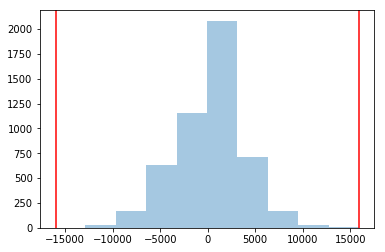

In [106]:
sns.distplot(pd.Series(null_stats), bins = 10, kde=False)

pval = (float(np.count_nonzero(null_stats >= t_stat)) + float(np.count_nonzero(null_stats <= -t_stat))) / 10000.0

print("p-value:{0}".format(pval))

plt.axvline(t_stat, color='r')
plt.axvline(-t_stat, color='r')

So, do we reject the null?

Yes.

What does this mean? 

Rejecting the null doesn't give us any claim of causation. We cannot say the changing administration had an effect on the salaries, even though that's the only variable we checked. This is because we treated our data as a simple random sample, not an experiment with controls. 

What could have produced these results?

Next, we should probably look at the total of all the salaries. Maybe the spending is the same but there are fewer positions. We could conduct this same procedure on the sum to get our result, or take advantage of the central limit theorem on sums to perform a t-test. Additionally, we need to look at the economy and state of the administration as a whole. Or, we could use a simple random sample of the salaries from the entire Obama administration and permutate with that, and do it repeatedly. There are potentially thousands of cofounding factors we could check. For the sake of time and resources, however, it's difficult to prove causation for simple random samples. Instead, we will be satisfied with the information the p-value gives us. We are confident that this outcome was not due to chance. 

And that's the end of the Practical Data Science Workshop! 